## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54
2015-12-31 19:06:00,432.52


In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [22]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,1.347772e+06
mean,4.503924e+03
std,3.956149e+03
min,1.500000e+00
25%,7.888900e+02
50%,3.788990e+03
75%,6.929443e+03
max,1.966575e+04


In [23]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,1.549523e+06
mean,4.091926e+03
std,3.913501e+03
min,6.000000e-02
25%,6.754000e+02
50%,2.710730e+03
75%,6.593500e+03
max,1.989199e+04


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

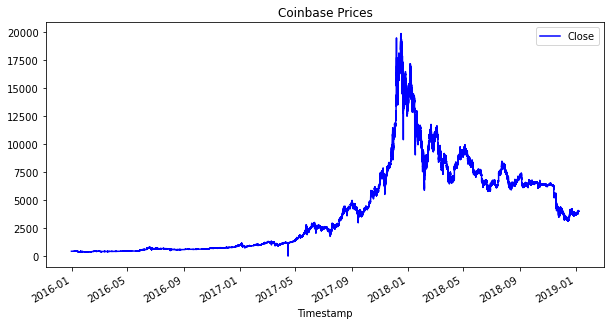

In [24]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase Prices", color="blue")

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

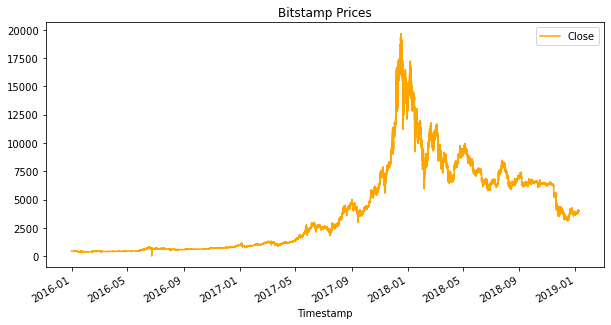

In [27]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10, 5), title="Bitstamp Prices", color="orange")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

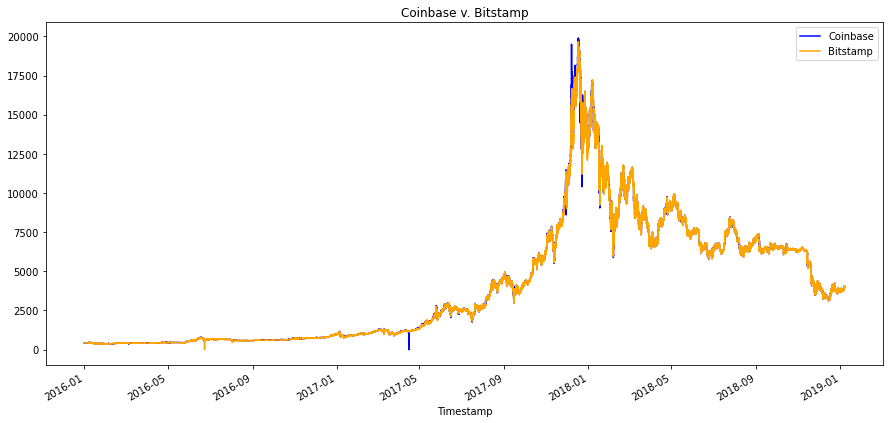

In [28]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

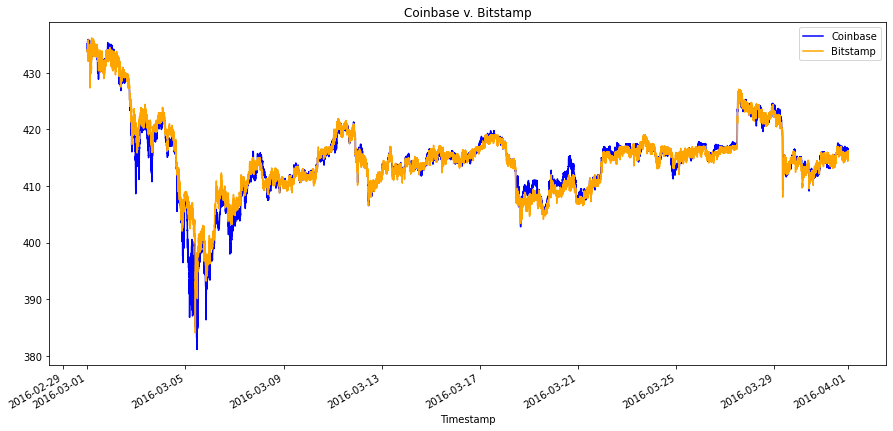

In [29]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced['Close'].loc['2016-03-01' : '2016-03-31'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].loc['2016-03-01' : '2016-03-31'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

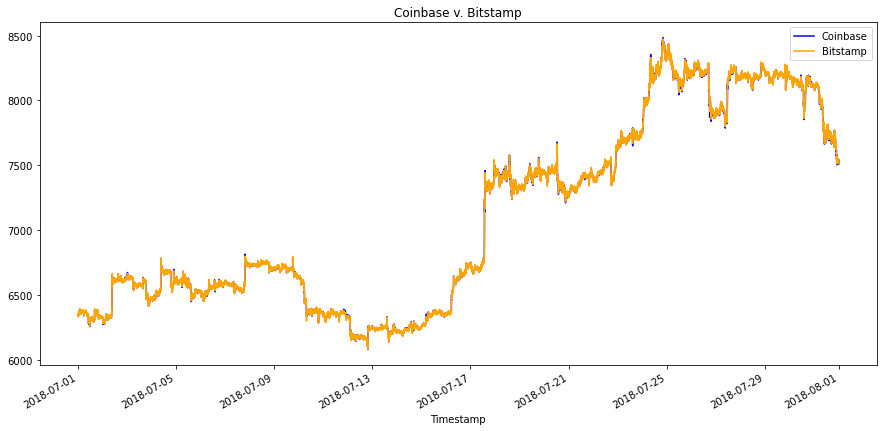

In [30]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
coinbase_sliced['Close'].loc['2018-07-01' : '2018-07-31'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].loc['2018-07-01' : '2018-07-31'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # Yes, it appears that as time has progressed, the the degree of spread has gotten smaller.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

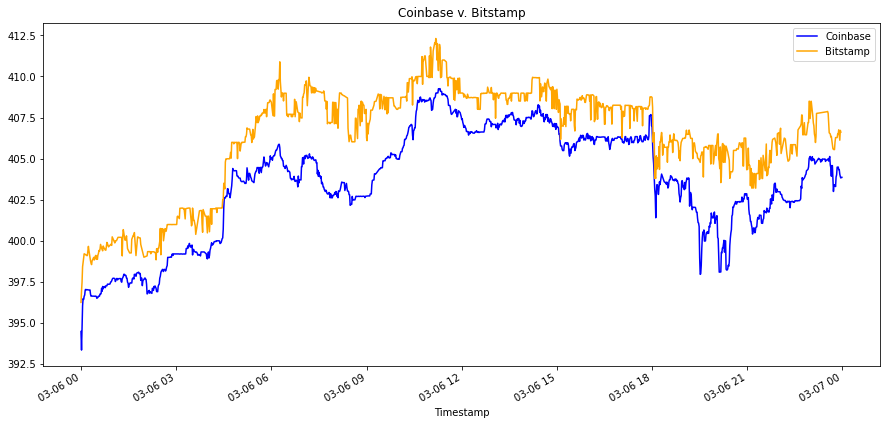

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['Close'].loc['2016-03-06'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].loc['2016-03-06'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

In [32]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2016-03-06'] - coinbase_sliced['Close'].loc['2016-03-06']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1034.000000
mean        2.715358
std         1.211380
min         0.070000
25%         1.940000
50%         2.385000
75%         3.320000
max         7.610000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread Early Date'}>

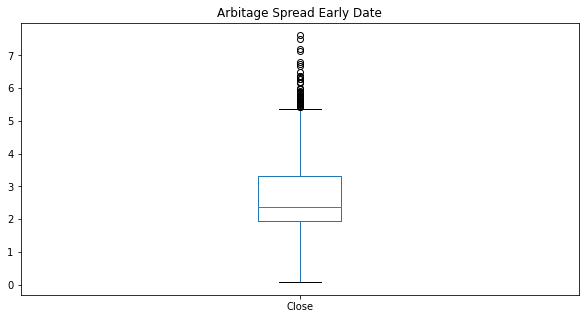

In [34]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.plot(figsize=(10, 5), title="Arbitage Spread Early Date", kind='box')

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

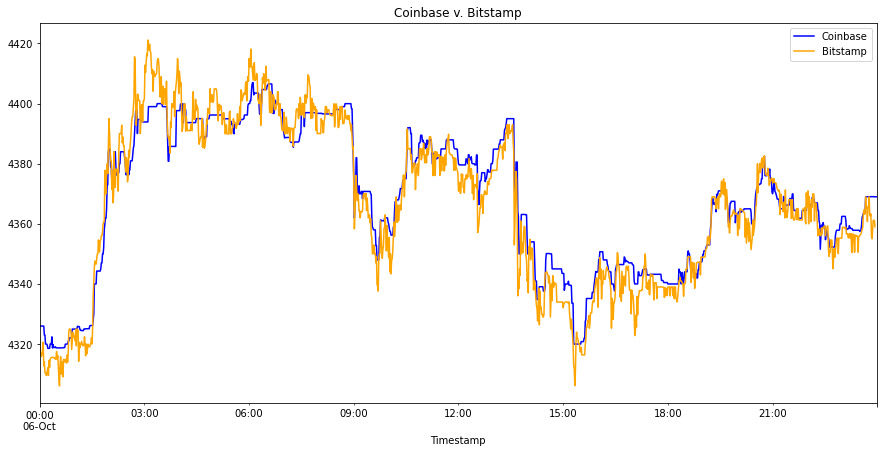

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['Close'].loc['2017-10-06'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].loc['2017-10-06'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

In [38]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2017-10-06'] - bitstamp_sliced['Close'].loc['2017-10-06']

# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()

count    1355.000000
mean        1.645882
std         6.324151
min       -27.270000
25%        -1.685000
50%         2.220000
75%         5.805000
max        27.960000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread Middle Date'}>

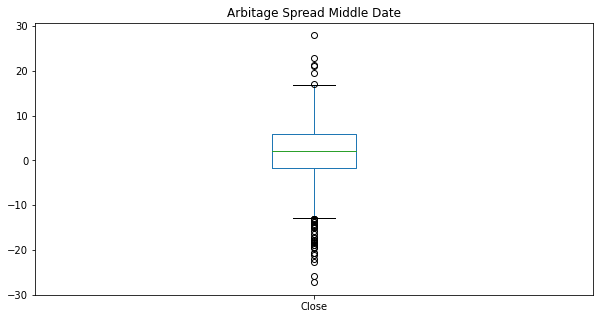

In [39]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(figsize=(10, 5), title="Arbitage Spread Middle Date", kind='box')

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

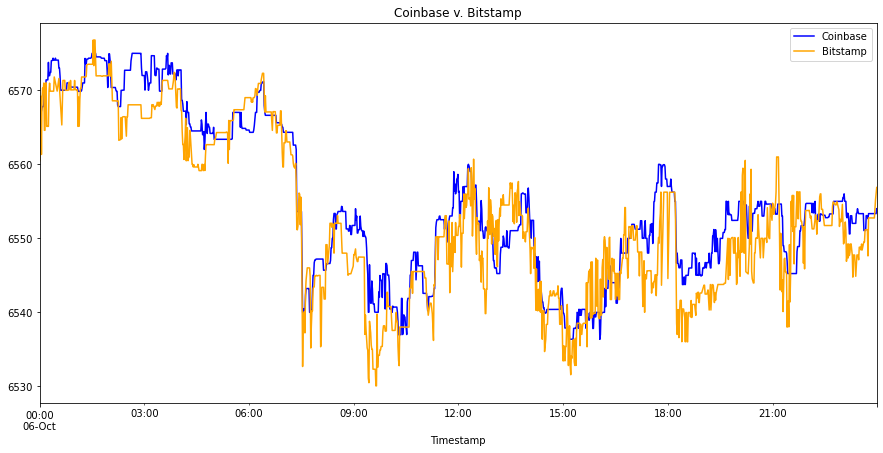

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['Close'].loc['2018-10-06'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['Close'].loc['2018-10-06'].plot(legend=True, figsize=(15, 7), color="orange", label="Bitstamp")

In [41]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-10-06'] - bitstamp_sliced['Close'].loc['2018-10-06']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1240.000000
mean        2.068226
std         3.973823
min       -10.570000
25%        -0.382500
50%         2.150000
75%         4.650000
max        13.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread Late Date'}>

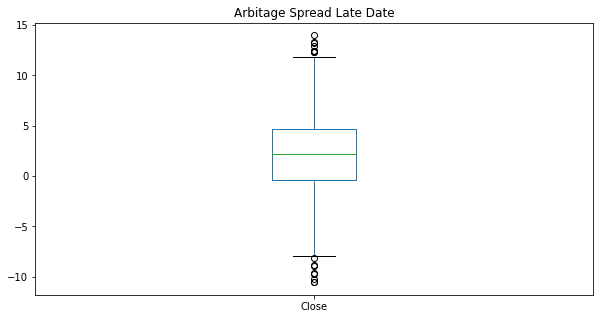

In [42]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(figsize=(10, 5), title="Arbitage Spread Late Date", kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [44]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2016-03-06'] - coinbase_sliced['Close'].loc['2016-03-06']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1034.000000
mean        2.715358
std         1.211380
min         0.070000
25%         1.940000
50%         2.385000
75%         3.320000
max         7.610000
Name: Close, dtype: float64

In [45]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2017-10-06'] - bitstamp_sliced['Close'].loc['2017-10-06']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    892.000000
mean       5.143105
std        3.605291
min        0.010000
25%        2.305000
50%        4.620000
75%        7.020000
max       27.960000
Name: Close, dtype: float64

In [46]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-10-06'] - bitstamp_sliced['Close'].loc['2018-10-06']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    892.000000
mean       3.926570
std        2.731957
min        0.010000
25%        1.790000
50%        3.530000
75%        5.475000
max       13.990000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [47]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase_sliced['Close'].loc['2016-03-06']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2016-03-06 00:00:00    0.004487
2016-03-06 00:01:00    0.009127
2016-03-06 00:02:00    0.007043
2016-03-06 00:03:00    0.005984
2016-03-06 00:04:00    0.005574
Name: Close, dtype: float64

In [48]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced['Close'].loc['2017-10-06']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2017-10-06 00:00:00    0.000800
2017-10-06 00:01:00    0.002087
2017-10-06 00:02:00    0.002082
2017-10-06 00:03:00    0.002329
2017-10-06 00:04:00    0.002152
Name: Close, dtype: float64

In [50]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced['Close'].loc['2018-10-06']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-10-06 00:00:00    0.001018
2018-10-06 00:01:00         NaN
2018-10-06 00:02:00         NaN
2018-10-06 00:03:00    0.000893
2018-10-06 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [51]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2016-03-06 06:10:00    0.010406
2016-03-06 06:11:00    0.010256
2016-03-06 06:12:00    0.010007
2016-03-06 06:16:00    0.012893
2016-03-06 06:17:00    0.011156
Name: Close, dtype: float64

In [54]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [55]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>.01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [56]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    150.000000
mean       0.012528
std        0.001978
min        0.010007
25%        0.010860
50%        0.012265
75%        0.013724
max        0.019116
Name: Close, dtype: float64

In [57]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [58]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [59]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced['Close'].loc['2016-03-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2016-03-06 06:10:00    4.22
2016-03-06 06:11:00    4.16
2016-03-06 06:12:00    4.06
2016-03-06 06:16:00    5.23
2016-03-06 06:17:00    4.52
                       ... 
2016-03-06 20:27:00    4.09
2016-03-06 21:36:00    4.19
2016-03-06 22:36:00    4.31
2016-03-06 22:41:00    4.45
2016-03-06 22:43:00    4.47
Name: Close, Length: 150, dtype: float64

In [60]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2017-10-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [61]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-10-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()
# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [62]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    150.000000
mean       5.039667
std        0.776675
min        4.060000
25%        4.392500
50%        4.945000
75%        5.537500
max        7.610000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profit Per Trade'}, xlabel='Timestamp'>

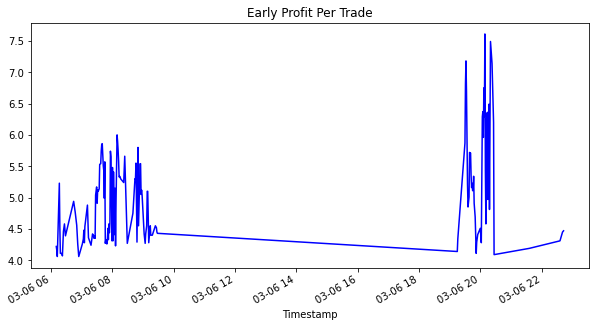

In [63]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(figsize=(10, 5), title="Early Profit Per Trade", color="blue")

In [64]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Profit Per Trade'}, xlabel='Timestamp'>

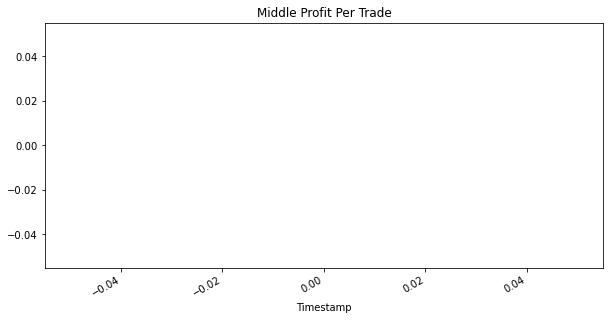

In [65]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(figsize=(10, 5), title="Middle Profit Per Trade", color="blue")

In [66]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Profit Per Trade'}, xlabel='Timestamp'>

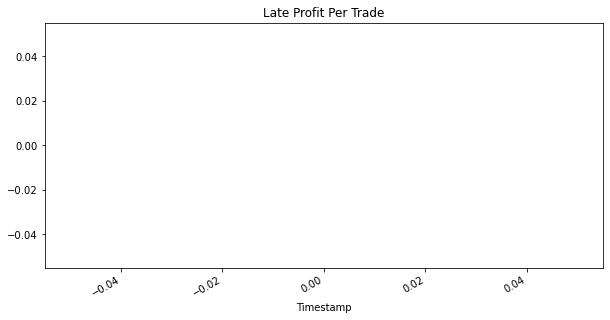

In [67]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(figsize=(10, 5), title="Late Profit Per Trade", color="blue")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [68]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

755.95

In [69]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [70]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [72]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Early Cumulative Profit Per Trade'}, xlabel='Timestamp'>

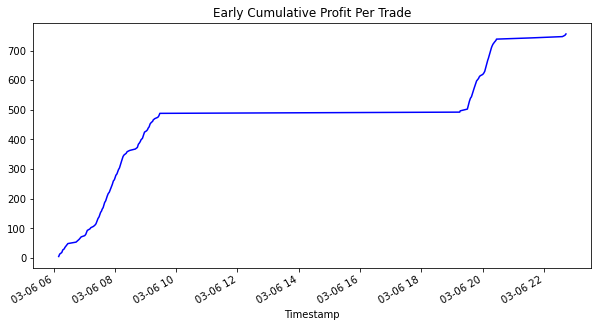

In [73]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(10, 5), title="Early Cumulative Profit Per Trade", color="blue")

In [74]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Middle Cumulative Profit Per Trade'}, xlabel='Timestamp'>

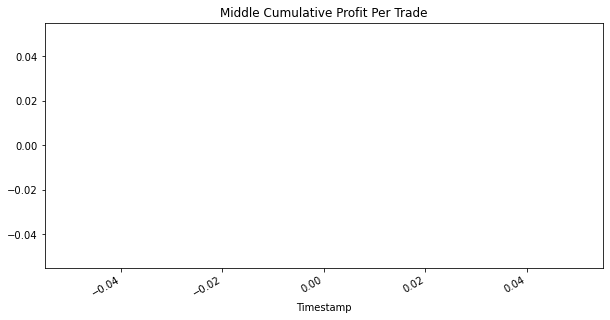

In [75]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(10, 5), title="Middle Cumulative Profit Per Trade", color="blue")

In [76]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Late Cumulative Profit Per Trade'}, xlabel='Timestamp'>

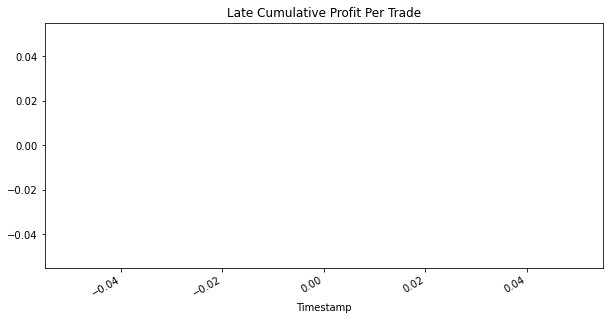

In [77]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 5), title="Late Cumulative Profit Per Trade", color="blue")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.